# What you'll learn

After watching this video, you will be able to: 
* Characterize the four types of SQL injection attacks.
* Explain how to prevent SQL injection attacks.

# Code injection

* A common type of SQL injection to watch for is code injection.
* A code injection is an attack that inserts new SQL statements or database commands into another SQL statement.
* In code injection, typically the attacker will execute the two statements as one.

**For example:**

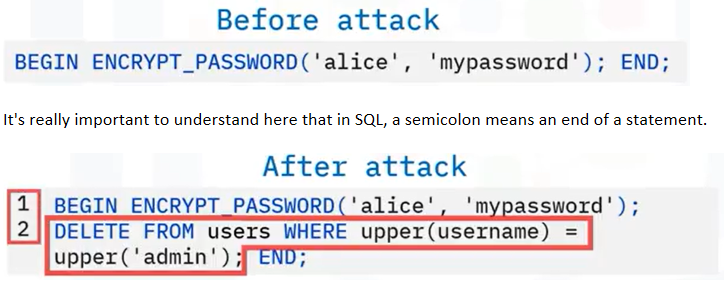

* After the attack the new SQL statement is a two statements that execute as one.
* The attacker inserts a second SQL statement after the Procedural Language for SQL command to delete the **`admin`** user from the database.

## Attack on database

In a code injection attack, the attacker can delete a table or your whole database! 

**For example:**

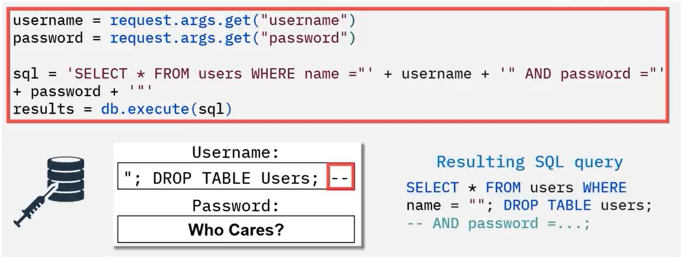

Now, the code injection happens.
* The attacker enters the user name as **`" "; DROP TABLE Users; --`** and for password they type in **`Who Cares?`**. 
* Because as you'll see in a moment, it doesn't matter what the password is because you will never get there.
* The double dash **`--`** in sql syntax is a comment character.
* So, the **`--`** comments out the remainder of the query.
* Now, the resulting query is **`SELECT * FROM Users WHERE Name = "";  DROP TABLE Users; -- AND password = …`**.
* That's a whole new statement that gets executed.
* Then **`--`**, it doesn't matter what the rest of the string is, because it's all taken as a comment, and the interpreter ignores it.
* The SQL is valid and it will delete the entire **`Users`** table by dropping the table from the database because **`;`** will terminate one query and start another.

# Function call injection

Next, a function call injection is an attack that inserts a custom function into a vulnerable SQL statement.

An attacker can compromise a custom function by:
* sending data from a database to a remote computer, 
* changing passwords, or 
* performing sensitive database transactions.

**For example:**

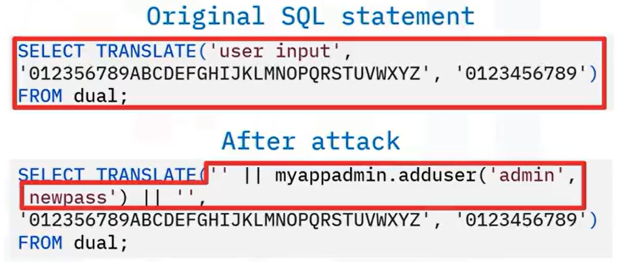

What you need to understand here is that in SQL the double vertical bar **`||`** is a concatenation character.
* So it's looking to execute the **`adduser()`** function to concatenate the results into the statement.
* However; it's not the results that we're interested in.
* The attacker just wants you to run **`adduser()`** and that's exactly what happens so here.
* The attacker can modify the function with user input to create new application users.

# Buffer overflows

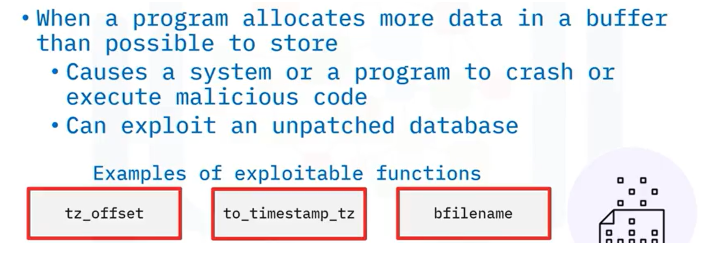

Now, a buffer overflow is when a program allocates more data in a buffer than the buffer can store.
* A buffer contains temporary storage for data transfers.
* A buffer overflow causes a system or program to crash or execute malicious code.
* An attacker can use a buffer overflow SQL injection to exploit an unpatched database with functions such as: 
    * **`tz_offset`**, which returns the time zone offset; 
    * or **`to_timestamp_tz`**, which converts an input expression into a timestamp; 
    * And **`bfilename`**, which returns a BFILE locator associated with a physical large object binary file on the system.
* All of these functions had vulnerabilities.
* If you do not patch a database for buffer overflow vulnerabilities, an attacker can use SQL injection on these and other functions.

# Preventing SQL Injections

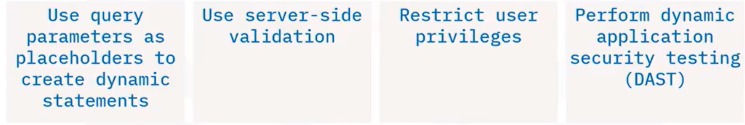

You can protect your application against SQL injection attacks with these preventative measures.
* Use query parameters as placeholders to create statements that are dynamic.
* The SQL interpreter will check values in your query when it executes.
* Validate on the server side instead of on the client side to identify untrusted data inputs.
* Restrict user privileges to avoid giving the attacker authorization. For example, start their access with read-only access.
* Perform dynamic application security testing (or **DAST**), which can identify vulnerabilities when you release new code to production.

Here is an example of what you should be doing.

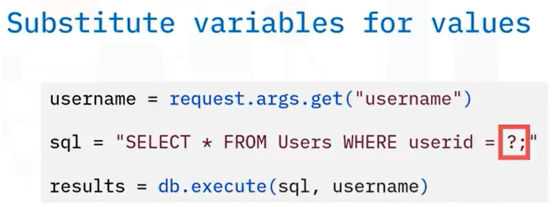

This example uses query parameters to prevent SQL manipulation attacks.
* The code is **`username = request.args.get("username")`** just like before, but then the SQL statement is different.
* It's **`"SELECT * FROM Users WHERE userid = ?;"`** and then, it calls **`db.execute()`** on not only the **`sql`** variable, but also passing in the **`username`** to get the result.
* The **`?`** parameter in the statement is a placeholder for a value.
* Now, you are using **variable substitution**.
* And when the SQL interpreter checks each parameter, it will treat the input as a string, not as a statement.
* Any bad data will only be stored as a string in your database but will not get executed.

# Summary

In this video, you learned that: 
* Code injection attacks insert new SQL statements or database commands into another SQL statement, causing them to execute as one.
* Function call injection attacks insert a custom function into a vulnerable SQL statement allowing them to:
    * perform unauthorized changes, 
    * transactions, or 
    * potentially compromising remote computers.
* Buffer overflow attacks can cause crashes by allocating more data to the buffer than what it can hold.
* To prevent SQL injection attacks, use query parameters as placeholders.
* Use server-side validation to identify untrusted data inputs.
* Restrict user privileges to prevent attackers from obtaining that level of authorization.
* Keep your database patched and perform dynamic application security testing (or DAST) to identify vulnerabilities during new code releases.